# Probability 

Probability allows us to talk about uncertainty, in certain terms. Once, we are able to quantify uncertainties, we can deterministically make deductions about the future. The language of statistics also allows us to talk about uncertainty in uncertain but tractable terms that we can reason about.

## Random Variable

A **random variable** is a mathematical formalization of an abstract quantity that has some degree of uncertainty associated with the values it may take on. 
The set of all possible values that a random variable can take on is called its **range**. 

A random variable is very much similar to a variable in computer programming. **In the context of `pandas`, a random variable is a column or feature in a `DataFrame`.**

Just as numerical features in a `DataFrame` can be either discrete or continuous, random variables can also be either discrete or continuous. The two types require different mathematical formalizations as we will see later.

Random variables are usually denoted by capital letters, such as $X$ or $Y$. The values that a random variable can take on are denoted by lower case letters, such as $x$ or $y$.

It is important to note that in the real world, it is _often impossible to obtain the range_ of a random variable. Since most real-world datasets are **samples**, **`df['X'].unique()` does not necessarily give us the range of $X$**.

It is also important to remember that **$x$ is a single value** but **$X$ is a collection of values** (i.e. `pd.Series`). 

In the example below, $C$ (coin) and $D$ (dice) are two random variables. 

In [68]:
import pandas as pd 

data = pd.read_csv('../data/experiment.csv')
data.head()

,C,D
0,T,1
1,T,3
2,T,3
3,H,2
4,T,1


The ranges of $C$ and $D$ are $\{H, T\}$ and $\{1, 2, 3, 4, 5, 6\}$ respectively. It is worth repeating for emphasis that the ranges of the two variables is independent of observed data, since the observed data is a limited sample.

## Experiment, Outcome $\omega$ and Sample Space $\Omega$

An **outcome**, denoted by $\omega$, is the set of values that one or more random variables take on as a result of an **experiment**.

An **experiment** is a process that yields outcomes out of set of all possible outcomes. 

The **sample space**, denoted by $\Omega$, is the set of all possible outcomes. 

The important operative word here is _"possible"_. <u>The sample space is _not_ the set of all _observed_ outcomes</u>, the set of all possible outcomes.

If an experiment involves two random variables say $X$ and $Y$ which _can_ take on $n$ possible values (i.e. $~\text{range}_X = \{x_1, x_2, \ldots, x_n\})$ and $m$ possible values (i.e. $~\text{range}_Y = \{y_1, y_2, \ldots, y_m\}$) respectively, then the sample space $\Omega$ is the set of all possible combinations of $x_i$ and $y_j$ and is of size $n \times m$. 

<br/>
<center>

|**$\omega_i$** | **$X$** | **$Y$** | 
|:----:|:----:|:----:|
|$\omega_1$ | $x_1$ | $y_1$ | 
|$\omega_2$ | $x_1$ | $y_2$ | 
|: | : | : | 
| $\omega_{m}$ | $x_1$ | $y_m$ |
| $\omega_{m+1}$ | $x_2$ | $y_1$ |
| $\omega_{m+2}$ | $x_2$ | $y_2$ |
|: | : | : | 
| $\omega_{n \times m}$ | $x_n$ | $y_m$ |

</center>
<br/>

In other words, the sample space is the **cross product of the ranges of all random variables** involved in the experiment.

In our example, the experiment is the act of tossing a coin and rolling a dice. 

Each row in the data is an outcome $w_i$ from the set of all possible outcomes $\Omega$. 

$C$ variable can take on two ($n=2$) values: $\{H, T\}$ and $D$ variable can take on six $m=6$ value: $\{1, 2, 3, 4, 5, 6\}$. This means that the sample space $\Omega$ is of size $n \times m = 2 \times 6 = 12$.

However, the observed outcomes are only 11, as shown below. 

In [73]:
data.groupby(['C', 'D']).count().reset_index()

,C,D
0,H,1
1,H,2
2,H,3
3,H,4
4,H,5
5,H,6
6,T,1
7,T,2
8,T,3
9,T,4


This means that the sample space $\Omega$ is not the set of all observed outcomes. This is despite the fact that many observed outcomes are observed more than once. The missing outcome, that is never observed, is $w_{12} = (T, 6)$.

## Probability Model $P(X)$

Probability model is a function that assigns a probability score $P(\omega_i)$ to each possible outcome $\omega_i$ for every $\omega_i \in \Omega$ such that 
<!-- $ 0 \lt P(\omega_i) \lt 1 $ and $\sum_{\omega \in \Omega} P(\omega_i) = 1$. -->
<!-- such that  -->

$$ 0 \lt P(\omega_i) \lt 1 ~~~\text{and}~~~ \sum_{\omega \in \Omega} P(\omega_i) = 1$$

For example, if we have a random variable $D$ for rolling a die, the probability model assigns a probability to each number that we can roll. The probability model is usually denoted by $P(\omega_i)$ or $P(D=d)$


$\omega$ | $D$ | $P(D=d)$ |
:-------:|:----:|:-----:|
$\omega_1$ | $1$ | $P(D=1)$ |
$\omega_2$ | $2$  | $P(D=2)$ |
$\omega_3$ | $3$  | $P(D=3)$ |
$\omega_4$ | $4$  | $P(D=4)$ |
$\omega_5$ | $5$  | $P(D=5)$ |
$\omega_6$ | $6$  | $P(D=6)$ |

such that $0 \leq P(D=d) \leq 1$ and and $\sum_{d \in D} P(d=D) = 1$.

In [80]:
fair_die = pd.read_csv('../data/fair_die.csv')
fair_die

,D,P(D)
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


The code cell above shows the probability model for the random variable $D$ for a fair die in our examples, where each number has a probability of $\frac{1}{6}$.

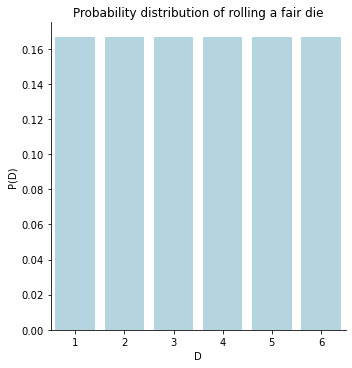

In [350]:
import seaborn as sns 
from matplotlib import pyplot as plt

axs = sns.catplot(data=fair_die, kind='bar', x="D", y="P(D)", color="lightblue");
axs.set(title="Probability distribution of rolling a fair die");

``` {admonition} A word of caution on <u>mathematical notation</u> and <u>dimensionality</u>: 

Uppercase letters ($X, Y ...$) often refer to a random variable. Lowercase letters ($x, y ...$) often refer to a particular outcome of a random variable.

The following refer to a probability <u>value</u> (`int`, `float` etc.):
* $P(X = x)$ 
    * also written in shorthand as $P(x)$
* $P(X = x ∧ Y = y)$  
    * also written in shorthand as $P(x, y)$

The following refer to <u>a collection of values</u> (`pd.Series`, `pd.DataFrame` etc.):

* $P(X)$
* $P(X ∧ Y)$
    * also written as P(X, Y)
* $P(X = x, Y)$


## Probability of an Event $P(\phi)$

An event $\phi$ is a set of possible worlds $\{\omega_i, \omega_j, ... \omega_n\}$. In other words, an event $\phi$ is a subset of $\Omega$ i.e. $\phi \subset \Omega$

If we continue with the example of rolling a die, we can define an event $\phi$ as the set of all possible worlds where the die rolls an even number. From the table above, we can see that there are three possible worlds where the die rolls an even number. 

Therefore, the event $\phi$ is the set $\{\omega_2, \omega_4, \omega_6\}$ or $\{D=2, D=4, D=6\}$.

<!-- An example of an event is at least one Heads  $ \phi = \{\omega_1 , \omega_2 , \omega_3\}$ -->

$P (\phi) = \sum_{\omega \in \phi} P(\omega)$ is the sum of probabilities of the set of possible worlds defining $\phi$

$P (\phi_1) = P(\text{Die rolls an even number}) = P(\omega_2) +P(\omega_4) + P(\omega_6) = 0.167 + 0.167 + 0.167  \approx 0.5 $


In [97]:
event_condition = fair_die['D'].apply(lambda x: x % 2 == 0)

event = fair_die[event_condition]

P_event = event['P(D)'].sum()

round(P_event, 2)

0.5

## Joint Probability $P(A, B)$

Joint probability is the probability of two events occurring together.The joint probability is usually denoted by $P(A, B)$, which is shorthand for $P(A \wedge B)$ read as _Probability of $A$ AND $B$._

Note that $P(A, B) = P(B, A)$ since $A \wedge B = B \wedge A$.

For example, if we are rolling two dice, the joint probability is the probability of rolling a 1 on the first die and a 2 on the second die. 

In Data Science, we rarely know the true joint probability. Instead, we estimate the joint probability from data. We will talk more about this when we talk about Statistics. 


In [355]:
joint_probs = pd.read_csv('../data/experiment_probs.csv')
joint_probs

,C,D,"P(C, D)"
0,H,1,0.24
1,H,2,0.13
2,H,3,0.09
3,H,4,0.01
4,H,5,0.03
5,H,6,0.01
6,T,1,0.19
7,T,2,0.09
8,T,3,0.13
9,T,4,0.04


In [267]:
joint_probs['P(C, D)'].sum()

1.0

Note that sum of joint probabilities is 1 i.e. $\sum P(C, D) = 1$ at the end of the day, since the sum of all probabilities is 1. 

The following three are all true at the same time: 

1. $\sum_{C, D} P(C, D) = 1$ where $P(C, D)$ is a probability table with 12 rows and 3 columns: $C, D, P(C, D)$.


2. $\sum_{C} P(C) = 1$ where $P(C)$ is a probability table with 2 rows (${H, T}$) and 2 columns: $C, P(C)$.


3. $\sum_{D} P(D) = 1$ where $P(D)$ is a probability table with 6 rows (${1, 2, 3, 4, 5, 6}$) and 2 columns: $D, P(D)$.


In [268]:
joint_probs

,C,D,"P(C, D)"
0,H,1,0.24
1,H,2,0.13
2,H,3,0.09
3,H,4,0.01
4,H,5,0.03
5,H,6,0.01
6,T,1,0.19
7,T,2,0.09
8,T,3,0.13
9,T,4,0.04


In [377]:
joint_probs["CD_vals"] = joint_probs.apply(lambda x: "C=%s and D=%s" % (x['C'], x['D']), axis=1)

In [378]:
joint_probs

,C,D,"P(C, D)",CD_vals
0,H,1,0.24,C=H and D=1
1,H,2,0.13,C=H and D=2
2,H,3,0.09,C=H and D=3
3,H,4,0.01,C=H and D=4
4,H,5,0.03,C=H and D=5
5,H,6,0.01,C=H and D=6
6,T,1,0.19,C=T and D=1
7,T,2,0.09,C=T and D=2
8,T,3,0.13,C=T and D=3
9,T,4,0.04,C=T and D=4


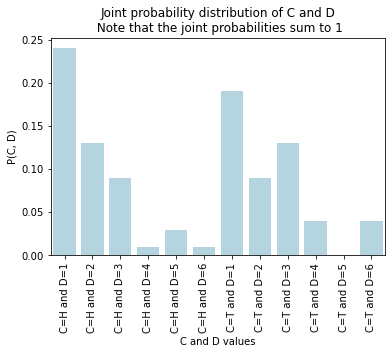

In [351]:
axs = sns.barplot(data=joint_probs, x="CD_vals", y="P(C, D)", color="lightblue");
axs.set(title="Joint probability distribution of C and D\n Note that the joint probabilities sum to 1", \
        xlabel="C and D values", \
        ylabel="P(C, D)");
plt.xticks(rotation=90);



## Marginal Probability $P(A)$

Because most data sets are multi-dimensional i.e. involving multiple random variables, we can sometimes find ourselves in a situation where we want to know the joint probability $P(A, B)$ of two random variables $A$ and $B$ but we don't know $P(A)$ or $P(B)$. In such cases, we compute the **marginal probability** of one variable from joint probability over multiple random variables. 

Marginalizing is the process of summing over one or more variables (say B) to get the probability of another variable (say A). This summing takes place over the joint probability table.

$$ P(A) = \sum_{b \in \Omega_B} P(A, B=b) $$


In [212]:
P_C = joint_probs.groupby('C').sum()['P(C, D)']
P_C.name = 'P(C)'
P_D = joint_probs.groupby('D').sum()['P(C, D)']
P_D.name = 'P(D)'
P_C

C
H    0.51
T    0.49
Name: P(C), dtype: float64

In [224]:
P_D, P_D.sum()

(D
 1    0.43
 2    0.22
 3    0.22
 4    0.05
 5    0.03
 6    0.05
 Name: P(D), dtype: float64,
 1.0)

In [376]:
joint_probs

,C,D,"P(C, D)"
0,H,1,0.24
1,H,2,0.13
2,H,3,0.09
3,H,4,0.01
4,H,5,0.03
5,H,6,0.01
6,T,1,0.19
7,T,2,0.09
8,T,3,0.13
9,T,4,0.04


In [368]:
joint_probs

,C,D,"P(C, D)"
0,H,1,0.24
1,H,2,0.13
2,H,3,0.09
3,H,4,0.01
4,H,5,0.03
5,H,6,0.01
6,T,1,0.19
7,T,2,0.09
8,T,3,0.13
9,T,4,0.04


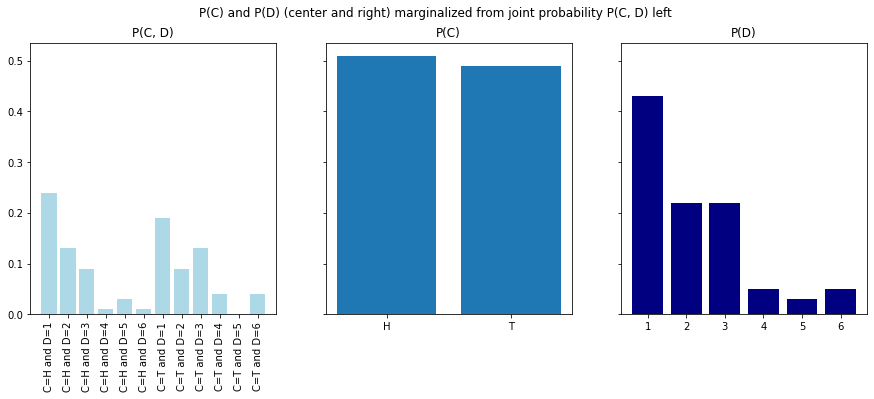

In [403]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].bar(joint_probs["CD_vals"], joint_probs["P(C, D)"], color="lightblue");
axs[1].bar(P_C.index, P_C);
axs[2].bar(P_D.index, P_D, color="navy");

axs[0].tick_params('x', labelrotation=90)

axs[0].set_title("P(C, D)");
axs[1].set_title("P(C)");
axs[2].set_title("P(D)");

fig.suptitle("P(C) and P(D) (center and right) marginalized from joint probability P(C, D) left");

As we look at new concepts in probability, it is important to stay mindful of i) what the probability sums to ii) what are the dimensions of the table that represents the probability.

You can see from the cell below that the dimensions of marginal probability table is the length of the range of the variable.

You can see from the code below that both the computed marginal probabilities in add up to 1. 

In [230]:
P_C.sum().round(3), P_D.sum().round(3)

(1.0, 1.0)

## Independent Random Variables

Random variables can be either independent or dependent. If two random variables are independent, then the value of one random variable does not affect the value of the other random variable. 

For example, if we are rolling two dice, we can use two random variables to represent the numbers that we roll. The two random variables are independent because the value of one die does not affect the value of the other die. If two random variables are dependent, then the value of one random variable does affect the value of the other random variable. For example, if we are measuring the temperature and the humidity, we can use two random variables to represent the temperature and the humidity. The two random variables are dependent because the temperature affects the humidity and the humidity affects the temperature.

More formally, **two random variables $X$ and $Y$ are independent if and only if $P(X, Y) = P(X) \cdot P(Y)$**.

In [214]:
P_C.name = "P(C)"
P_D.name = "P(D)"
merged = pd.merge(joint_probs, P_C, on='C')
merged = pd.merge(merged,      P_D, on='D')
merged

,C,D,"P(C, D)",P(C),P(D)
0,H,1,0.24,0.51,0.43
1,T,1,0.19,0.49,0.43
2,H,2,0.13,0.51,0.22
3,T,2,0.09,0.49,0.22
4,H,3,0.09,0.51,0.22
5,T,3,0.13,0.49,0.22
6,H,4,0.01,0.51,0.05
7,T,4,0.04,0.49,0.05
8,H,5,0.03,0.51,0.03
9,T,5,0.00,0.49,0.03


In [217]:
merged['P(C) P(D)'] = merged['P(C)'] * merged['P(D)']
merged

,C,D,"P(C, D)",P(C),P(D),P(C) P(D)
0,H,1,0.24,0.51,0.43,0.2193
1,T,1,0.19,0.49,0.43,0.2107
2,H,2,0.13,0.51,0.22,0.1122
3,T,2,0.09,0.49,0.22,0.1078
4,H,3,0.09,0.51,0.22,0.1122
5,T,3,0.13,0.49,0.22,0.1078
6,H,4,0.01,0.51,0.05,0.0255
7,T,4,0.04,0.49,0.05,0.0245
8,H,5,0.03,0.51,0.03,0.0153
9,T,5,0.00,0.49,0.03,0.0147


In [218]:
merged[['P(C, D)', 'P(C) P(D)']].round(2)

,"P(C, D)",P(C) P(D)
0,0.24,0.22
1,0.19,0.21
2,0.13,0.11
3,0.09,0.11
4,0.09,0.11
5,0.13,0.11
6,0.01,0.03
7,0.04,0.02
8,0.03,0.02
9,0.00,0.01


The two random variables $C$ and $D$ therefore are NOT independent because $P(C, D) \neq P(C) \cdot P(D)$.

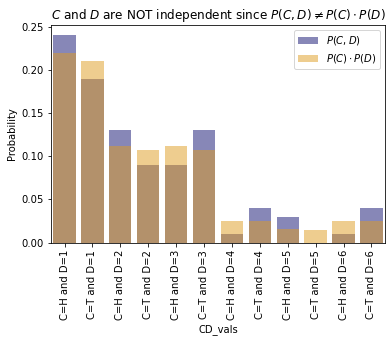

In [408]:
sns.barplot(data=merged, x="CD_vals", y="P(C, D)", color="navy", alpha=0.5, label="$P(C, D)$");
sns.barplot(data=merged, x="CD_vals", y="P(C) P(D)", color="orange", alpha=0.5, label="$P(C)\cdot P(D)$");
plt.xticks(rotation=90);
plt.ylabel("Probability");
plt.legend();
plt.title("$C$ and $D$ are NOT independent since $P(C, D) \\neq P(C) \cdot P(D)$");

## Conditional Probability $P(A | B)$

Conditional probability is the probability of one event occurring given that another event has occurred. 

The conditional probability is usually denoted by $P(A | B)$ and is defined as:

$$ P(A | B) = \frac{P(A, B)}{P(B)} $$

The denominator is the marginal probability of $B$.

<img width="80%" align="center" src="../assets/conditionalprob.png">

<br/>

For example, if we are flipping two coins, the conditional probability of flipping heads in the second toss, knowing the first toss was tails is: 

| Possible world | $\text{Coin}_1$ | $\text{Coin}_2$ | $P(\omega)$ |
|:----------------:|:-------------:|:-------------:|:-------------:|
| $\omega_1$ | H | H | 0.25 |
| $\omega_2$ | H | T | 0.25 |
| $\omega_3$ | T | H | 0.25 |
| $\omega_4$ | T | T | 0.25 |

$$ P(\text{Coin}_2 = H | \text{Coin}_1 = T) = \frac{P(\text{Coin}_2 = H, \text{Coin}_1 = T)}{P(\text{Coin}_1 = T)} = \frac{0.25}{0.5} = 0.5 $$

In [219]:
merged

,C,D,"P(C, D)",P(C),P(D),P(C) P(D)
0,H,1,0.24,0.51,0.43,0.2193
1,T,1,0.19,0.49,0.43,0.2107
2,H,2,0.13,0.51,0.22,0.1122
3,T,2,0.09,0.49,0.22,0.1078
4,H,3,0.09,0.51,0.22,0.1122
5,T,3,0.13,0.49,0.22,0.1078
6,H,4,0.01,0.51,0.05,0.0255
7,T,4,0.04,0.49,0.05,0.0245
8,H,5,0.03,0.51,0.03,0.0153
9,T,5,0.00,0.49,0.03,0.0147


In [308]:
merged['P(D | C)'] = merged['P(C, D)'] / merged['P(C)']
merged['P(D | C)']

0     0.470588
1     0.387755
2     0.254902
3     0.183673
4     0.176471
5     0.265306
6     0.019608
7     0.081633
8     0.058824
9     0.000000
10    0.019608
11    0.081633
Name: P(D | C), dtype: float64

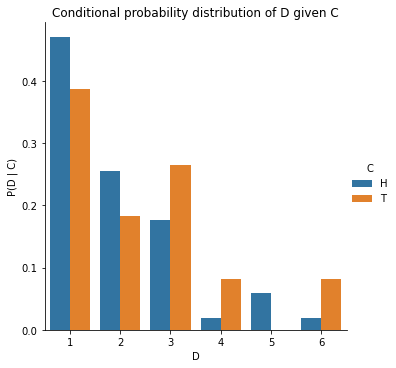

In [312]:
merged[['C', 'D', 'P(D | C)']]

axs = sns.catplot(data=merged, x="D", y="P(D | C)", hue="C", kind="bar");
axs.set(title="Conditional probability distribution of D given C\nNote that the blue bars add up to 1");

Note that the sum of conditional probabilites, unlike joint probability, is not 1. 

In [410]:
merged["P(D | C)"].sum()

2.0

This is because 

$$ \sum_C \sum_D P(D|C) = \sum_D P(D|C=\text{Heads}) + \sum_D P(D|C=\text{Tails}) $$

And $\sum_D P(D|C=\text{Heads})$ and $\sum_D P(D|C=\text{Tails})$ are individually probability distributions that each sum to 1, over different values of $D$. 

In other words, in the plot above, the blue bars add up to 1 and the orange bars add up to 1. 

In [415]:
heads = merged[merged["C"] == "H"]
tails = merged[merged["C"] == "T"]

heads["P(D | C)"].sum(), tails["P(D | C)"].sum()

(1.0, 1.0)

## Product Rule $P(A, B)$

Rearranging the definition of conditional probability, we get the product rule:

$$ P(A, B) = P(A | B) \cdot P(B) $$

Similarly, we can also write:

$$ P(A, B) = P(B | A) \cdot P(A)$$

In summary, 

$$ P(A, B) = P(A | B) \cdot P(B) = P(B | A) \cdot P(A)$$

## Chain Rule $P(A, B, C)$

The chain rule is a generalization of the product rule to more than two events.

$ P(A, B, C) = P(A | B, C) \cdot P(B, C) $

$P(A, B, C) = P(A | B, C) \cdot P(B | C) \cdot P(C)$

since $P(B, C) = P(B | C) \cdot P(C)$ as per the product rule.

**Chain rule essentially allows expressing the joint probability of multiple random variables as a product of conditional probabilities.** This is useful because conditional probabilities are often easier to estimate from data than joint probabilities.


## Inclusion-Exclusion Principle $P(A \vee B)$

Inclusion-Exclusion Principle is a way of calculating the probability of two events occurring i.e. $ P(A=a ~\text{OR}~ B=b) $ denoted generally as $P(A = a \vee B = b)$.

It is defined as:

$$ P(A = a \vee B = b) = P(A = a) + P(B = b) - P(A = a \wedge B = b) $$

<img align="center" width="80%" src="../assets/inclusion_exclusion.png">

For example, if we are rolling two dice, the Inclusion-Exclusion Principle can be used to calculate the probability of rolling a 1 on the first die or a 2 on the second die.

$P(\text{Coin}_1=H \vee \text{Coin}_2=T) $

$ = P(\text{Coin}_2=H) + P(\text{Coin}_1=T) - P(\text{Coin}_2=H ∧ \text{Coin}_1=T)$

$ = 0.5 + 0.5 - 0.25 $

$ = 0.75$ 


## Bayes Theorem $P(A|B)$

Bayes theorem is a way of calculating conditional probability. For example, if we are rolling two dice, Bayes theorem can be used to calculate the probability of rolling a 1 on the first die given that we rolled a 2 on the second die.

$$ P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)} $$

$P(A|B)$ in the context of Bayes theorem is called the **Posterior** probability. 

$P(B|A)$ is called the **Likelihood**. 

$P(A)$ is called the **Prior** probability. 

$P(B)$ is called the **Evidence**, also known as _Marginal Likelihood_.

$$ P(\text{Posterior}) = \frac{P(\text{Likelihood})\cdot P(\text{Prior})}{P(\text{Evidence})}$$



<center><img width="40%" src="https://www.analyticsvidhya.com/wp-content/uploads/2016/06/12.jpg"></center>

<!-- 
## Expectation

Expectation is the average value of a random variable. For example, if we are rolling a die, the expectation is the average value of the number that we roll. The expectation is usually denoted by $E(X)$.

$$ E(X) = \sum_{x \in X} x \cdot P(X=x) $$

## Variance

Variance is a measure of how spread out a random variable is. For example, if we are rolling a die, the variance is a measure of how spread out the numbers that we roll are. The variance is usually denoted by $Var(X)$.

$$ Var(X) = E((X - E(X))^2) = E(X^2) - E(X)^2 $$

## Covariance

Covariance is a measure of how two random variables vary together. For example, if we are rolling two dice, the covariance is a measure of how the numbers that we roll on the two dice vary together. The covariance is usually denoted by $Cov(X, Y)$.

$$ Cov(X, Y) = E((X - E(X)) \cdot (Y - E(Y))) = E(X \cdot Y) - E(X) \cdot E(Y) $$

## Correlation

Correlation is a measure of how two random variables vary together. For example, if we are rolling two dice, the correlation is a measure of how the numbers that we roll on the two dice vary together. The correlation is usually denoted by $Corr(X, Y)$.

$$ Corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X) \cdot Var(Y)}} $$ -->

Bayes Theorem allows a formal method of updating prior beliefs with new evidence and is the foundation of Bayesian Statistics. We will talk more about this when we talk about Statistics. 

In machine learning, the task is often to find $P(Y | X_1 = x_1, X_2 = x_2, \ldots X_D = x_D)$ i.e. the probability of an unknown Y, given some values for $D$ features ($X_1, X_2 \ldots X_D$). Bayes theorem allows us to calculate this probability from the data. 

Let's assume we are interested in predicting if a person is a football player ($Y_F=1$) or not ($Y_F=0$), given their height ($X_H$) and weight ($X_W$).

Say, we observe a person who is 7 feet tall and weighs 200 pounds. We can use Bayes theorem to calculate the probability of this person being a football player using the following equation:

$P(Y | X_H = 7, X_W = 200) = \frac{P(X_H = 7, X_W = 200 | Y_F) \cdot P(Y_F)}{P(X_H = 7, X_W = 200)}$

Note that here $P(X_H = 7, X_W = 200 | Y_F)$ is the **Likelihood** probability of observing someone who is 7 feet tall and weighs 200 pounds, knowing if they are a football player. 

$P(Y_F)$ is the **Prior** probability of a person being a football player out of the entire population. 

$P(X_H = 7, X_W = 200)$ is the probability of the **Evidence** i.e. probability  of observing _anyone_ who is 7 feet tall and weighs 200 pounds in the entire population.